<a href="https://colab.research.google.com/github/sanjeev29/EVA-4/blob/master/S7/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/S7/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/S7


# Import Libraries

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [3]:
import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


# Plot training images

plane   dog  deer  deer


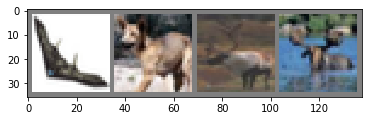

In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
import model

# Model parameters

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = model.Net().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,248
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,248
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14      

# Loss function and optimizer



In [0]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training and Testing

In [0]:
import train
import test

# Training and testing our model

In [9]:
epochs = 50

for epoch in range(epochs):
  train.train(net, device, loader.trainloader, optimizer, criterion, epoch)
  test.test(net, device, loader.testloader, criterion)

Epoch= 0 Loss=1.5175896883010864 Batch_id=390 Accuracy=36.51: 100%|██████████| 391/391 [00:13<00:00, 29.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0157, Accuracy: 2899/10000 (28.99%)



Epoch= 1 Loss=1.1434059143066406 Batch_id=390 Accuracy=51.41: 100%|██████████| 391/391 [00:13<00:00, 29.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0127, Accuracy: 4116/10000 (41.16%)



Epoch= 2 Loss=1.2211676836013794 Batch_id=390 Accuracy=58.22: 100%|██████████| 391/391 [00:13<00:00, 29.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0113, Accuracy: 4652/10000 (46.52%)



Epoch= 3 Loss=0.9534072875976562 Batch_id=390 Accuracy=62.24: 100%|██████████| 391/391 [00:13<00:00, 28.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0117, Accuracy: 4456/10000 (44.56%)



Epoch= 4 Loss=1.0047485828399658 Batch_id=390 Accuracy=65.67: 100%|██████████| 391/391 [00:13<00:00, 29.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0099, Accuracy: 5387/10000 (53.87%)



Epoch= 5 Loss=0.7041537165641785 Batch_id=390 Accuracy=68.11: 100%|██████████| 391/391 [00:13<00:00, 29.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0094, Accuracy: 5794/10000 (57.94%)



Epoch= 6 Loss=0.8618212938308716 Batch_id=390 Accuracy=70.30: 100%|██████████| 391/391 [00:12<00:00, 30.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0087, Accuracy: 6023/10000 (60.23%)



Epoch= 7 Loss=0.8165203928947449 Batch_id=390 Accuracy=71.87: 100%|██████████| 391/391 [00:13<00:00, 29.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 6400/10000 (64.00%)



Epoch= 8 Loss=0.6487306356430054 Batch_id=390 Accuracy=73.49: 100%|██████████| 391/391 [00:13<00:00, 29.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0071, Accuracy: 6839/10000 (68.39%)



Epoch= 9 Loss=0.6909686326980591 Batch_id=390 Accuracy=74.82: 100%|██████████| 391/391 [00:13<00:00, 29.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 6604/10000 (66.04%)



Epoch= 10 Loss=0.7776921391487122 Batch_id=390 Accuracy=75.65: 100%|██████████| 391/391 [00:12<00:00, 30.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0074, Accuracy: 6647/10000 (66.47%)



Epoch= 11 Loss=0.6088033318519592 Batch_id=390 Accuracy=76.81: 100%|██████████| 391/391 [00:13<00:00, 29.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 7207/10000 (72.07%)



Epoch= 12 Loss=0.6153035759925842 Batch_id=390 Accuracy=77.72: 100%|██████████| 391/391 [00:13<00:00, 30.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 7014/10000 (70.14%)



Epoch= 13 Loss=0.5559870004653931 Batch_id=390 Accuracy=78.32: 100%|██████████| 391/391 [00:13<00:00, 29.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 6746/10000 (67.46%)



Epoch= 14 Loss=0.7201830148696899 Batch_id=390 Accuracy=79.30: 100%|██████████| 391/391 [00:12<00:00, 30.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0063, Accuracy: 7299/10000 (72.99%)



Epoch= 15 Loss=0.6227577328681946 Batch_id=390 Accuracy=79.82: 100%|██████████| 391/391 [00:12<00:00, 30.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0059, Accuracy: 7451/10000 (74.51%)



Epoch= 16 Loss=0.6503275036811829 Batch_id=390 Accuracy=80.10: 100%|██████████| 391/391 [00:13<00:00, 29.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 7169/10000 (71.69%)



Epoch= 17 Loss=0.5448874831199646 Batch_id=390 Accuracy=80.91: 100%|██████████| 391/391 [00:12<00:00, 30.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 7374/10000 (73.74%)



Epoch= 18 Loss=0.5753169059753418 Batch_id=390 Accuracy=81.33: 100%|██████████| 391/391 [00:13<00:00, 29.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 7258/10000 (72.58%)



Epoch= 19 Loss=0.6546000838279724 Batch_id=390 Accuracy=81.63: 100%|██████████| 391/391 [00:13<00:00, 29.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0055, Accuracy: 7659/10000 (76.59%)



Epoch= 20 Loss=0.6388214230537415 Batch_id=390 Accuracy=82.21: 100%|██████████| 391/391 [00:13<00:00, 29.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0055, Accuracy: 7625/10000 (76.25%)



Epoch= 21 Loss=0.486713707447052 Batch_id=390 Accuracy=82.72: 100%|██████████| 391/391 [00:13<00:00, 28.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0055, Accuracy: 7571/10000 (75.71%)



Epoch= 22 Loss=0.4485342502593994 Batch_id=390 Accuracy=83.07: 100%|██████████| 391/391 [00:13<00:00, 29.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0054, Accuracy: 7639/10000 (76.39%)



Epoch= 23 Loss=0.574480414390564 Batch_id=390 Accuracy=83.42: 100%|██████████| 391/391 [00:13<00:00, 28.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0053, Accuracy: 7694/10000 (76.94%)



Epoch= 24 Loss=0.46946579217910767 Batch_id=390 Accuracy=83.92: 100%|██████████| 391/391 [00:14<00:00, 27.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 7944/10000 (79.44%)



Epoch= 25 Loss=0.624252200126648 Batch_id=390 Accuracy=83.95: 100%|██████████| 391/391 [00:13<00:00, 29.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0055, Accuracy: 7570/10000 (75.70%)



Epoch= 26 Loss=0.5511481165885925 Batch_id=390 Accuracy=84.45: 100%|██████████| 391/391 [00:13<00:00, 29.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0049, Accuracy: 7880/10000 (78.80%)



Epoch= 27 Loss=0.5022347569465637 Batch_id=390 Accuracy=84.58: 100%|██████████| 391/391 [00:13<00:00, 29.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0050, Accuracy: 7787/10000 (77.87%)



Epoch= 28 Loss=0.36713868379592896 Batch_id=390 Accuracy=84.77: 100%|██████████| 391/391 [00:13<00:00, 28.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0056, Accuracy: 7554/10000 (75.54%)



Epoch= 29 Loss=0.3392355442047119 Batch_id=390 Accuracy=85.05: 100%|██████████| 391/391 [00:13<00:00, 29.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0052, Accuracy: 7723/10000 (77.23%)



Epoch= 30 Loss=0.37583833932876587 Batch_id=390 Accuracy=85.57: 100%|██████████| 391/391 [00:13<00:00, 29.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0057, Accuracy: 7483/10000 (74.83%)



Epoch= 31 Loss=0.41112393140792847 Batch_id=390 Accuracy=85.72: 100%|██████████| 391/391 [00:13<00:00, 29.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0051, Accuracy: 7766/10000 (77.66%)



Epoch= 32 Loss=0.44518914818763733 Batch_id=390 Accuracy=86.10: 100%|██████████| 391/391 [00:13<00:00, 27.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 7912/10000 (79.12%)



Epoch= 33 Loss=0.32140064239501953 Batch_id=390 Accuracy=86.26: 100%|██████████| 391/391 [00:13<00:00, 28.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0049, Accuracy: 7872/10000 (78.72%)



Epoch= 34 Loss=0.23957934975624084 Batch_id=390 Accuracy=86.56: 100%|██████████| 391/391 [00:13<00:00, 29.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 7972/10000 (79.72%)



Epoch= 35 Loss=0.3568514287471771 Batch_id=390 Accuracy=86.60: 100%|██████████| 391/391 [00:13<00:00, 29.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0050, Accuracy: 7811/10000 (78.11%)



Epoch= 36 Loss=0.3927379548549652 Batch_id=390 Accuracy=86.93: 100%|██████████| 391/391 [00:13<00:00, 28.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0052, Accuracy: 7752/10000 (77.52%)



Epoch= 37 Loss=0.3536887466907501 Batch_id=390 Accuracy=87.01: 100%|██████████| 391/391 [00:13<00:00, 28.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0049, Accuracy: 7867/10000 (78.67%)



Epoch= 38 Loss=0.4985528588294983 Batch_id=390 Accuracy=87.55: 100%|██████████| 391/391 [00:13<00:00, 29.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0051, Accuracy: 7768/10000 (77.68%)



Epoch= 39 Loss=0.358588308095932 Batch_id=390 Accuracy=87.44: 100%|██████████| 391/391 [00:13<00:00, 29.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0050, Accuracy: 7800/10000 (78.00%)



Epoch= 40 Loss=0.27995336055755615 Batch_id=390 Accuracy=87.68: 100%|██████████| 391/391 [00:13<00:00, 28.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 7991/10000 (79.91%)



Epoch= 41 Loss=0.3111189901828766 Batch_id=390 Accuracy=88.03: 100%|██████████| 391/391 [00:13<00:00, 33.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0050, Accuracy: 7863/10000 (78.63%)



Epoch= 42 Loss=0.37931546568870544 Batch_id=390 Accuracy=88.09: 100%|██████████| 391/391 [00:13<00:00, 28.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0044, Accuracy: 8086/10000 (80.86%)



Epoch= 43 Loss=0.4399483799934387 Batch_id=390 Accuracy=88.03: 100%|██████████| 391/391 [00:13<00:00, 29.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0044, Accuracy: 8029/10000 (80.29%)



Epoch= 44 Loss=0.3576982021331787 Batch_id=390 Accuracy=88.33: 100%|██████████| 391/391 [00:14<00:00, 27.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0044, Accuracy: 8104/10000 (81.04%)



Epoch= 45 Loss=0.32486090064048767 Batch_id=390 Accuracy=88.77: 100%|██████████| 391/391 [00:14<00:00, 26.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 7992/10000 (79.92%)



Epoch= 46 Loss=0.3917451500892639 Batch_id=390 Accuracy=88.68: 100%|██████████| 391/391 [00:14<00:00, 27.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 7976/10000 (79.76%)



Epoch= 47 Loss=0.39562225341796875 Batch_id=390 Accuracy=88.93: 100%|██████████| 391/391 [00:14<00:00, 28.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0050, Accuracy: 7852/10000 (78.52%)



Epoch= 48 Loss=0.2924724519252777 Batch_id=390 Accuracy=89.05: 100%|██████████| 391/391 [00:14<00:00, 27.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0043, Accuracy: 8149/10000 (81.49%)



Epoch= 49 Loss=0.24829716980457306 Batch_id=390 Accuracy=89.15: 100%|██████████| 391/391 [00:14<00:00, 27.56it/s]



Validation set: Average loss: 0.0041, Accuracy: 8226/10000 (82.26%)



# Result visualization

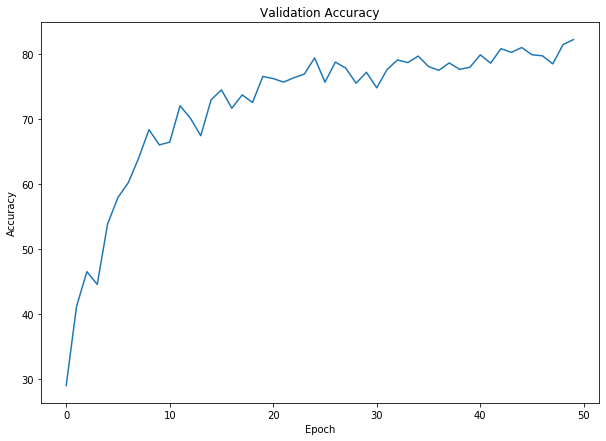

In [17]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.plot(test.test_acc)
axs.set_title("Validation Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S7/validation_accuracy_change_plot.jpg')

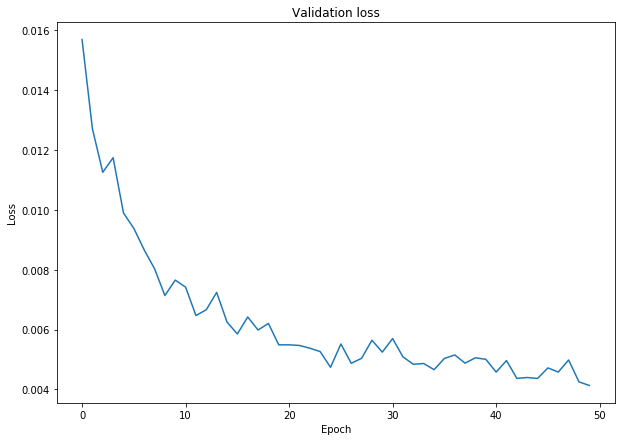

In [18]:
val_loss_fig, axs = plt.subplots(1,1,figsize=(10,7))

axs.plot(test.test_losses)
axs.set_title("Validation loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Loss")
val_loss_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S7/validation_loss_change_plot.jpg')

GroundTruth:    car   cat truck   cat


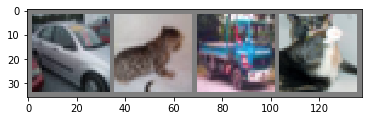

In [13]:
dataiter = iter(loader.testloader_for_plot)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    car   cat truck   cat


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [16]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader.testloader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = net(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 79/79 [00:01<00:00, 40.35it/s]

Accuracy of plane : 86 %
Accuracy of   car : 82 %
Accuracy of  bird : 88 %
Accuracy of   cat : 65 %
Accuracy of  deer : 94 %
Accuracy of   dog : 80 %
Accuracy of  frog : 86 %
Accuracy of horse : 82 %
Accuracy of  ship : 96 %
Accuracy of truck : 86 %
